In [ ]:
%pip install mglearn # do this only for the first time

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.svm import  LinearSVC

# Import of the file

Import of the file (table 100x16, where number of rows is number of patients and columns are intervals. The last column is "Category", with values "Control" and "MI"). Intervals are features and column "Category" is label.

In [247]:
file="Patients"
df=pd.read_excel("C:\\Users\\Ehlimana\\Desktop\\Classification\\Patients.xlt",header=0) 

It is expected that all columns except the last one are type float64.

In [235]:
df.dtypes

RR                 float64
PR                 float64
QRS                float64
QT                 float64
QTc                float64
PRq                float64
ST                 float64
TP                 float64
P_duration         float64
T_duration         float64
T_peak_to_T_end    float64
PP                 float64
P_amplitude        float64
QRS_amplitude      float64
T_amplitude        float64
Category            object
dtype: object

The first five rows are shown in the next cell.

In [236]:
df.head()

RR      PR     QRS      QT     QTc     PRq       ST      TP  \
0  580.95  177.46  96.739  347.71  16.076  37.050  120.490  525.17   
1  580.95  203.81  63.262  343.43  15.780  66.704   73.155  547.23   
2  580.95  178.37  95.866  338.88  15.709  35.816  108.790  517.25   
3  580.95  192.95  81.709  316.49  14.755  30.893   83.612  509.44   
4  580.95  173.89  81.643  362.95  16.709  36.070   68.354  536.84   

   P_duration  T_duration  T_peak_to_T_end      PP  P_amplitude  \
0      140.41      130.48           68.653  580.93     0.161910   
1      137.10      207.01          132.360  581.02     0.061079   
2      142.55      134.22           66.587  580.92    -0.128820   
3      162.06      151.17           67.232  580.93     0.028905   
4      137.82      212.95           73.095  580.94     0.109900   

   QRS_amplitude  T_amplitude   Category  
0        0.79685     0.136000  'Control'  
1       -0.22714    -0.064074  'Control'  
2       -0.83903    -0.140480  'Control'  
3        0.55972     0.100250  'Control'  
4        0.40406     0.058337  'Control'

Statistical summary is given by .describe()

In [237]:
df.describe()

RR          PR         QRS          QT         QTc         PRq  \
count  100.00000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   810.30950  186.429600   93.638280  378.221800   16.479480   39.285590   
std    135.40483   22.040337   14.227996   36.629054    1.620677   31.157183   
min    580.95000  135.420000   58.683000  309.890000   13.720000  -87.615000   
25%    766.30750  170.627500   84.230000  354.917500   15.214750   26.718750   
50%    775.31000  188.000000   95.162500  373.225000   16.751000   38.898500   
75%    886.95000  202.325000  100.845000  399.847500   17.694000   56.739250   
max    990.89000  243.500000  136.850000  537.780000   20.750000   97.985000   

              ST          TP  P_duration  T_duration  T_peak_to_T_end  \
count  100.00000  100.000000  100.000000   100.00000       100.000000   
mean   125.94672  564.651000  147.038500   158.63620        77.301610   
std     34.13660   48.325103   17.043668    33.55504        20.922673   
min     37.50200  470.890000  117.090000   128.46000        62.262000   
25%    104.10500  529.645000  136.807500   140.13000        67.166000   
50%    130.74000  567.595000  143.135000   148.01000        70.122500   
75%    155.38250  596.052500  152.325000   157.94000        73.014000   
max    178.21000  764.220000  216.520000   346.35000       188.920000   

              PP  P_amplitude  QRS_amplitude  T_amplitude  
count  100.00000   100.000000     100.000000   100.000000  
mean   810.06630     0.024521       2.320681     0.455360  
std    135.34986     0.060538      12.439841     1.887054  
min    580.87000    -0.128820     -17.864000    -0.558820  
25%    765.05750    -0.020581      -0.823920     0.052988  
50%    775.28000     0.037268       0.426510     0.179120  
75%    886.89000     0.063503      10.977500     0.367895  
max    990.78000     0.161910      55.886000    14.088000

# Visualization 

<IPython.core.display.Javascript object>


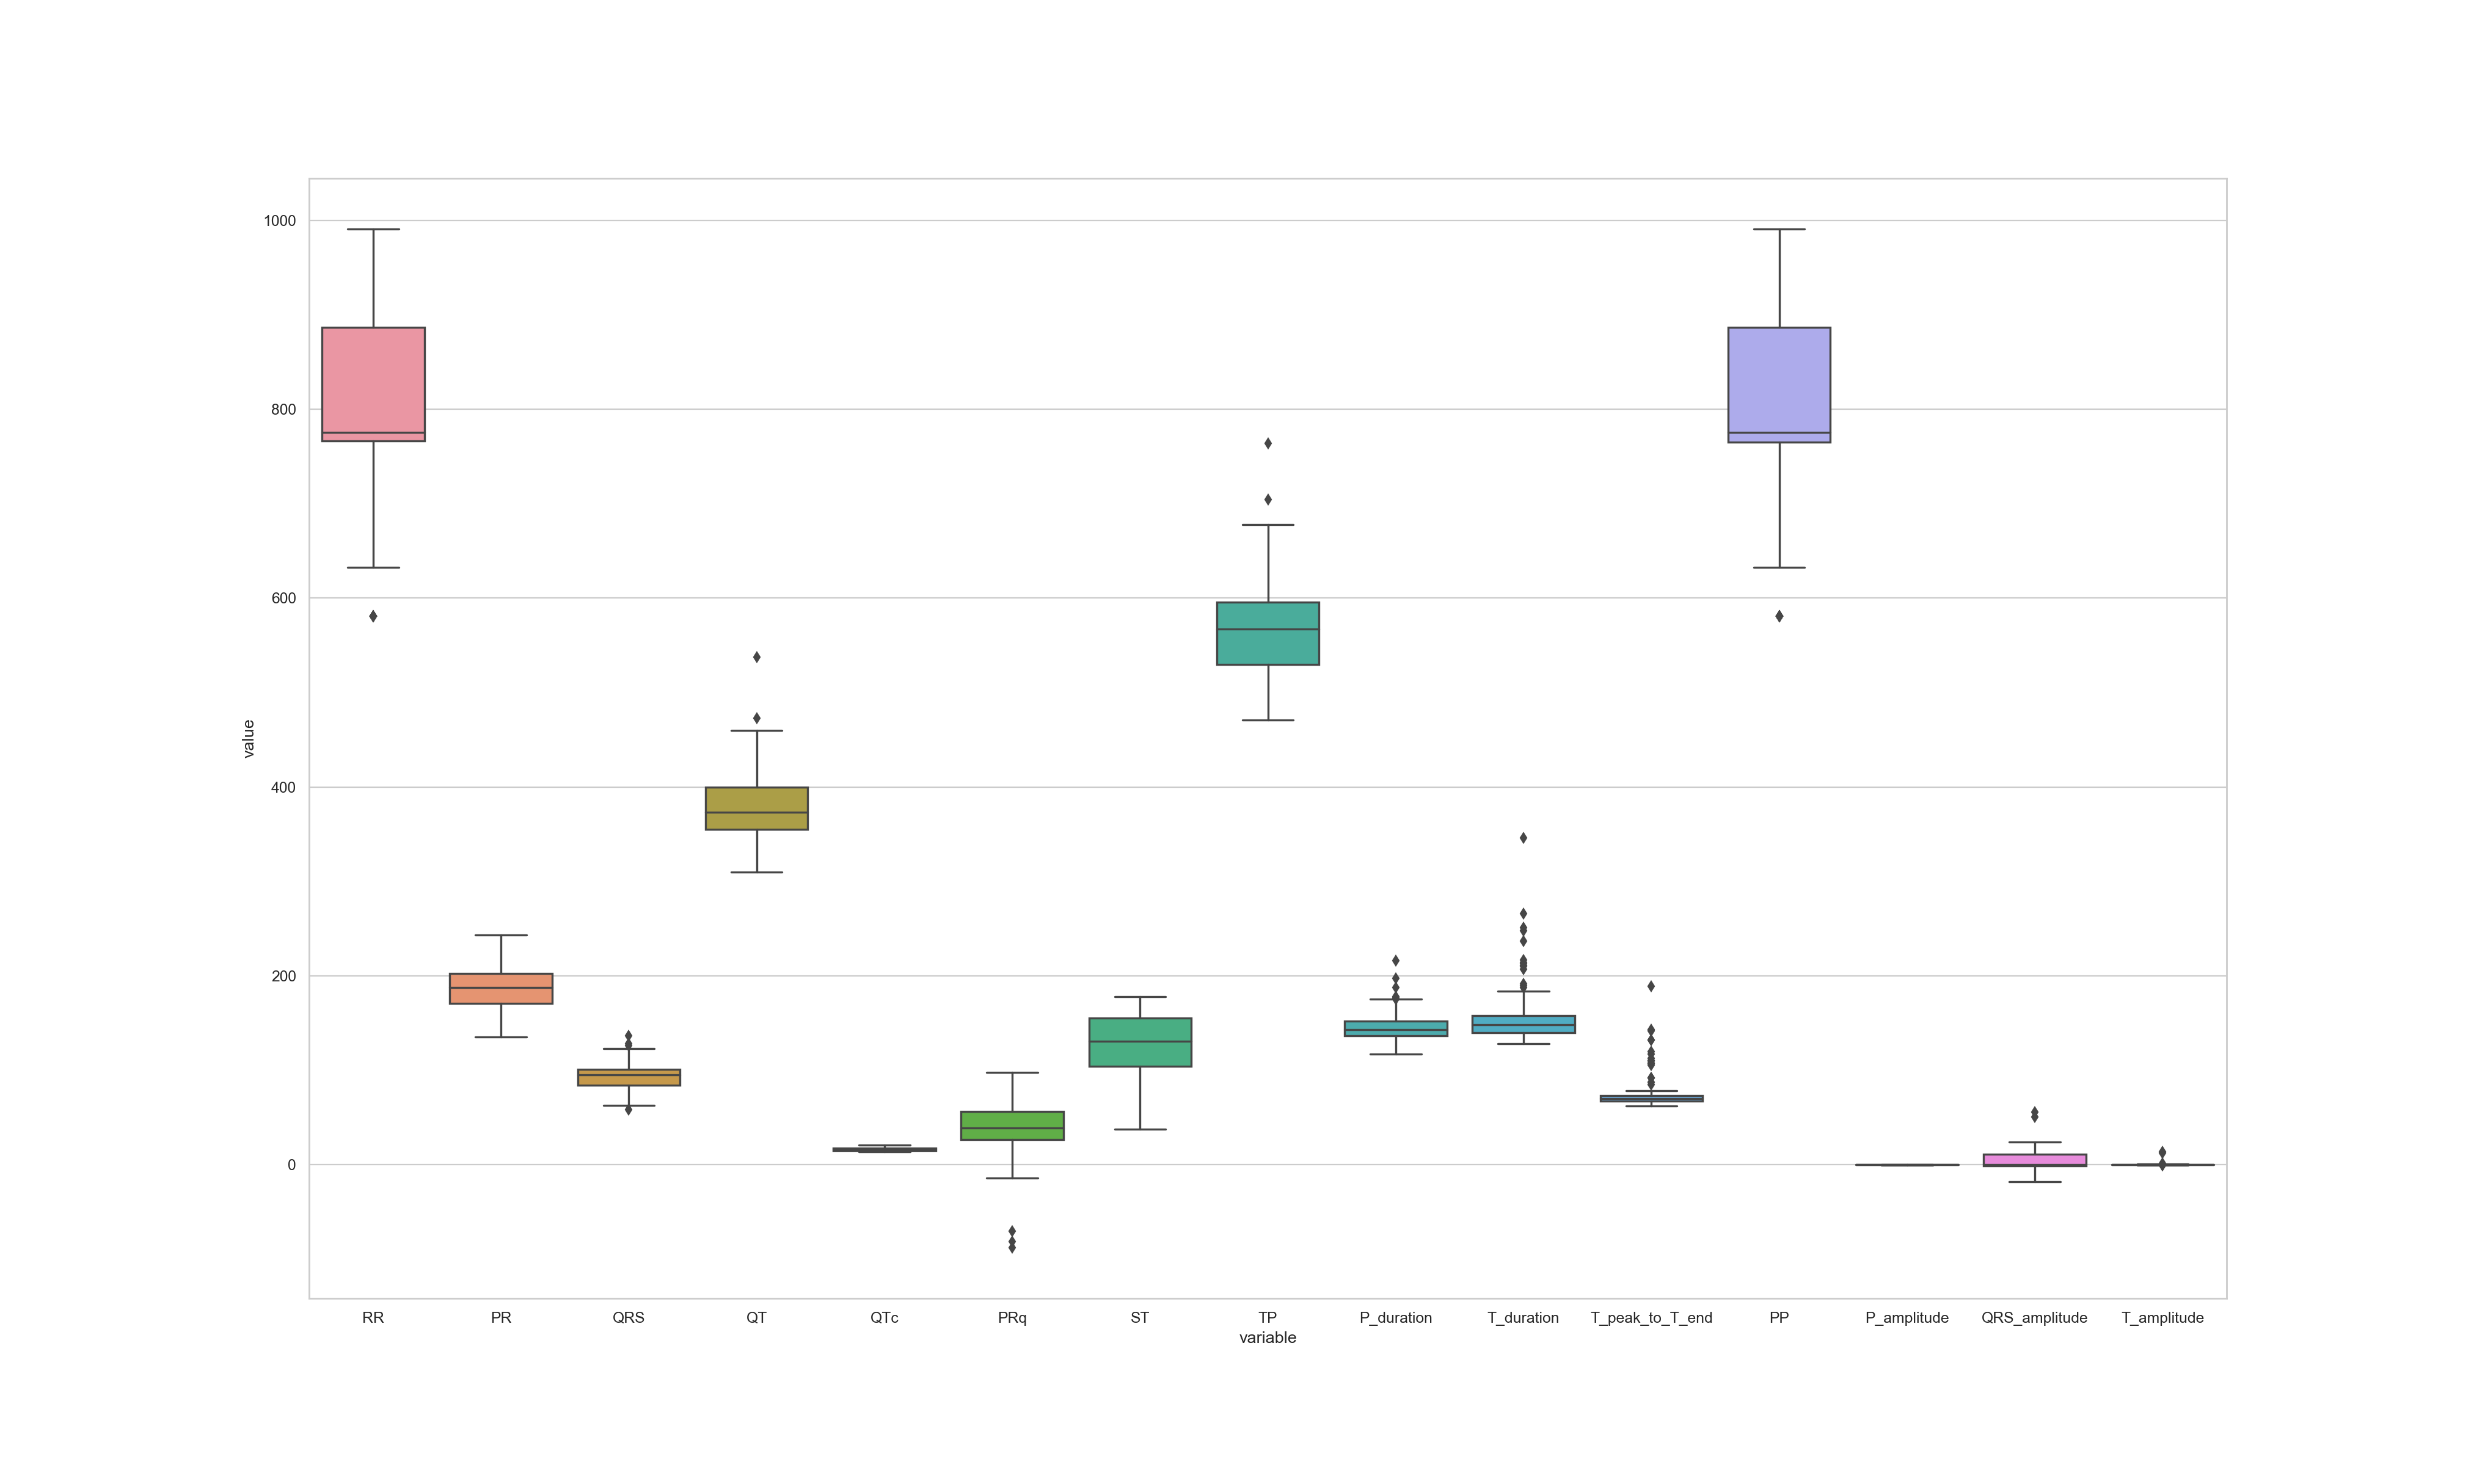

In [239]:
%matplotlib notebook
plt.figure(figsize=(25, 15))
sns.set_style("whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns[:15]]))
plt.show()


In [240]:
%matplotlib notebook
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g=sns.pairplot(df, hue=df.columns[15])
g.map_upper(hide_current_axis)

<IPython.core.display.Javascript object>

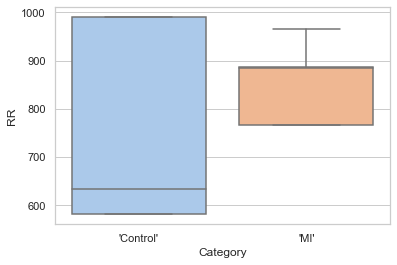

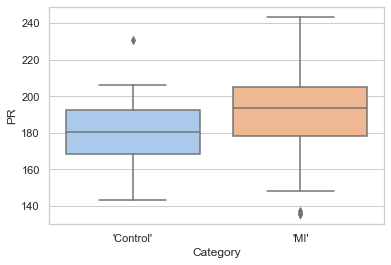

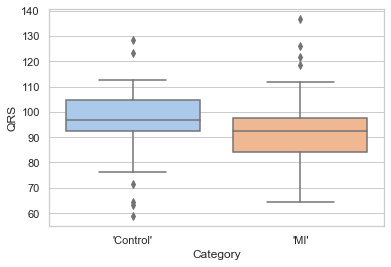

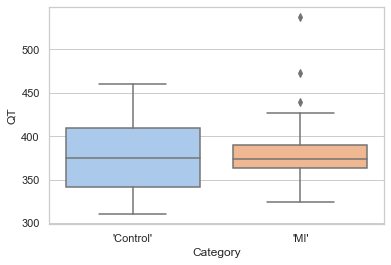

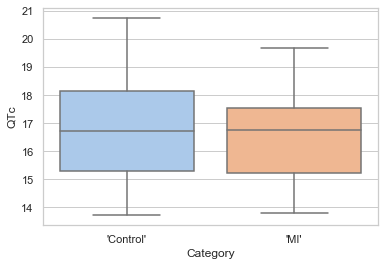

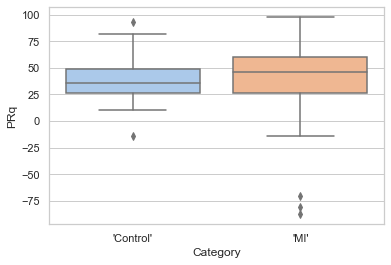

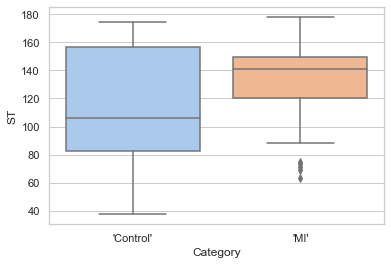

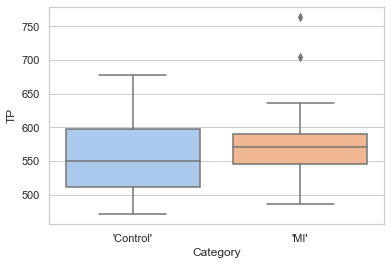

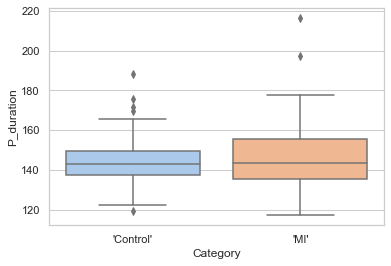

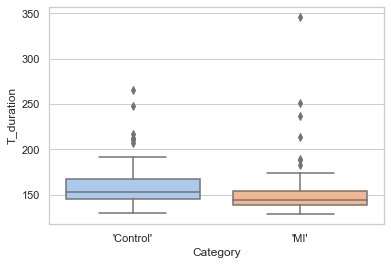

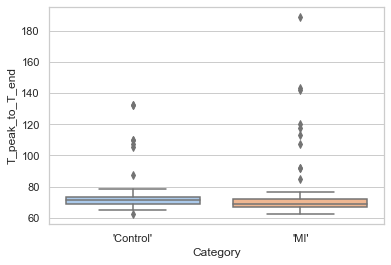

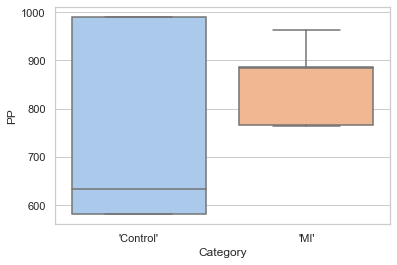

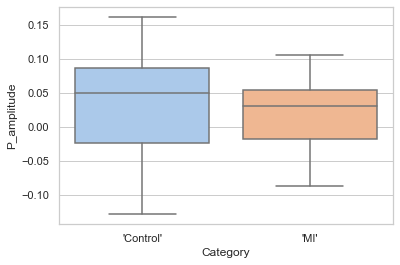

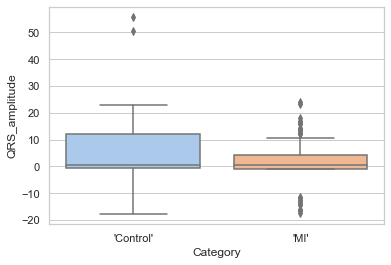

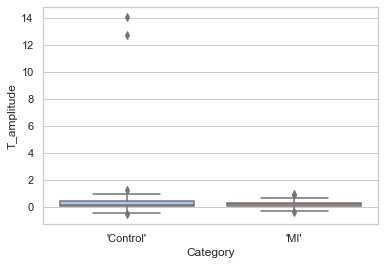

In [241]:
%matplotlib inline
def plot_box(df, cols, col_x = "Category"):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_box(df, df.columns[:15])

In addition to this, violin plot is added.
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.

The anatomy of a violin plot have many of the same summary statistics as box plots:

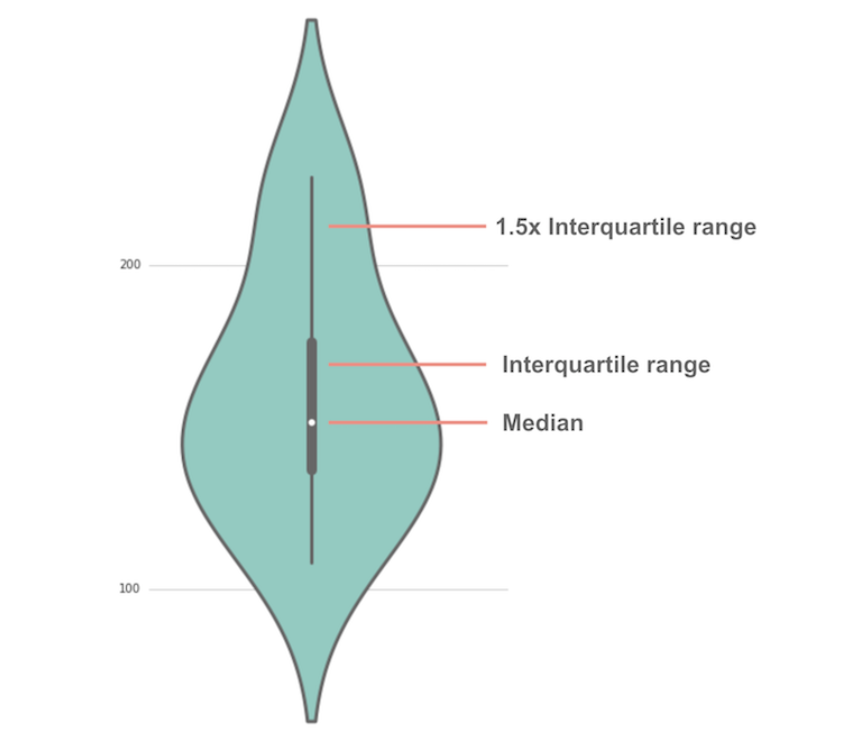
the white dot represents the median

the thick gray bar in the center represents the interquartile range

the thin gray line represents the rest of the distribution, except for points 
that are determined to be “outliers” using a method that is a function of the interquartile range.

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

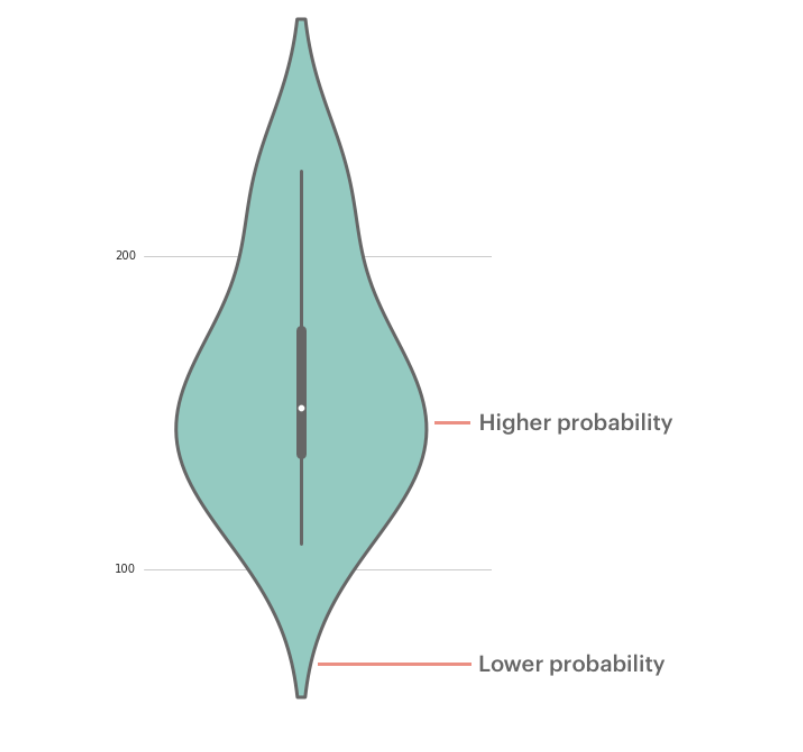

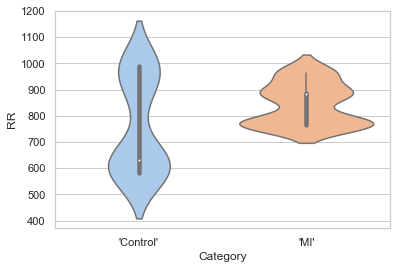

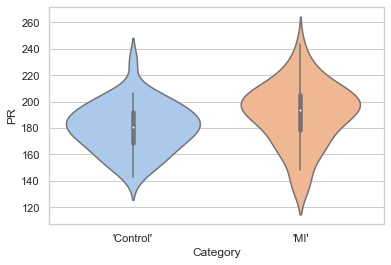

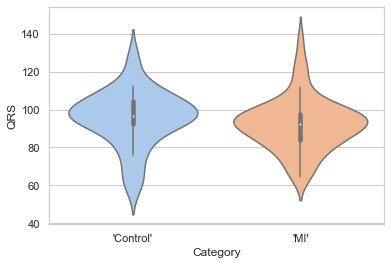

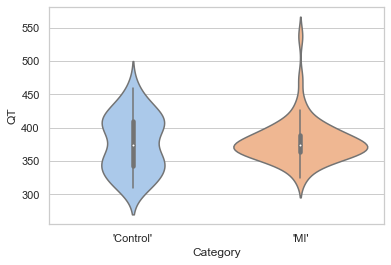

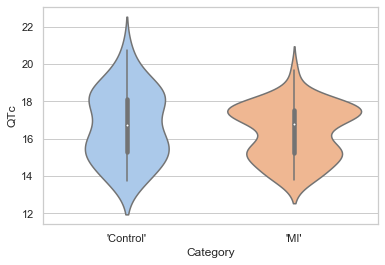

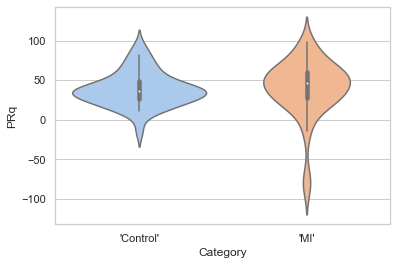

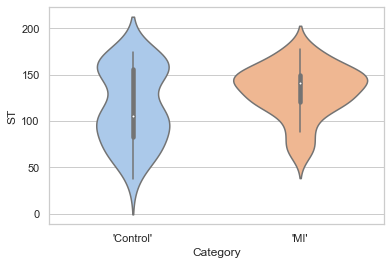

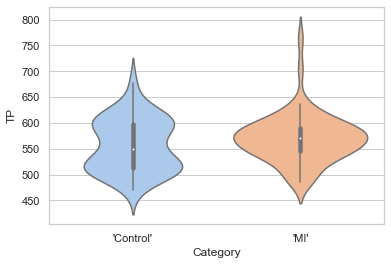

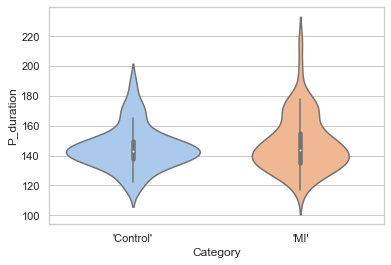

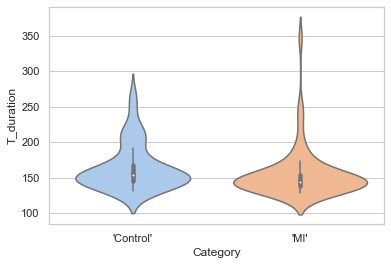

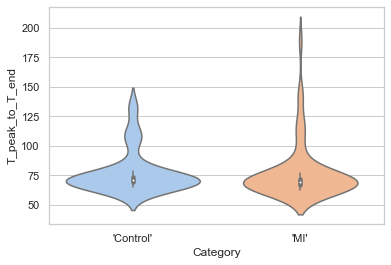

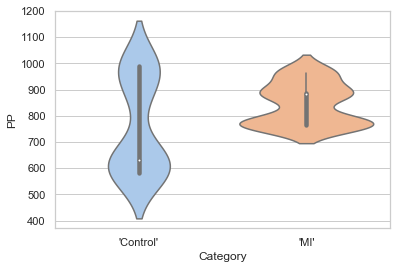

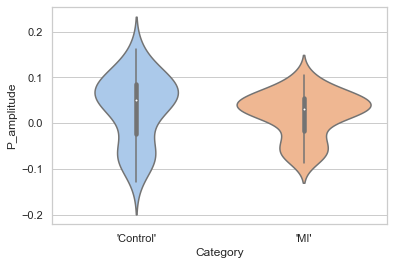

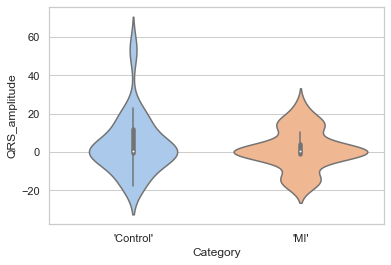

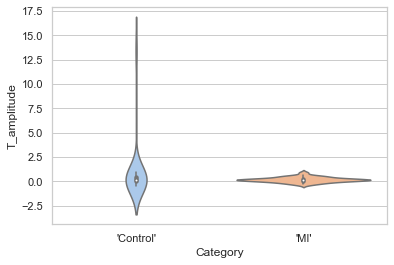

In [242]:
#violin will be explained later. White circle is the mean value
def plot_violin(df, cols, col_x = "Category"):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df, df.columns[:15])

For the next step, it is necessary to label classes "Control" with 1 and "MI" as 0 because it can not be done with string characters.

In [248]:
df["Category"] = df["Category"].map({"'Control'":1,"'MI'":0})

Data is split in train and test, with train size as 80% and test size as 20%.

In [250]:
df_split = train_test_split(np.asmatrix(df), train_size = 80,random_state=0)
df_train_features = df_split[0][:, :15]
df_train_labels = np.ravel(df_split[0][:, 15])
df_test_features = df_split[1][:, :15]
df_test_labels = np.ravel(df_split[1][:, 15])
print(df_train_features.shape)
print(df_train_labels.shape)
print(df_test_features.shape)
print(df_test_labels.shape)

(80, 15)
(80,)
(20, 15)
(20,)


# Evaluation of the model - Introduction

Given the results of the test data, how can you quantify the performance of the model? In general, you must **always use multiple metrics to evaluate the performance of any machine leaning model**, including classifiers. 

For classifiers there are a number of metrics commonly used. The **confusion matrix** lays out the correctly and incorrectly classified cases in a tabular format. There are various metrics derived from the values in the confusion matrix. Some of the common cases are briefly reviewed below. 

**Confusion matrix**

As already stated, the confusion matrix lays out correctly and incorrectly classified cases. For the binary (two-class) case the confusion matrix is organized as follows:

| | Scored Positive | Scored Negative|  
|------|:------:|:------:| 
|**Actual Positive** | True Positive | False Negative |
|**Actual Negative**| False Positive | True Negative |   

Here the four elements in the matrix are defined as:    
**True Positive** or **TP** are cases with positive labels which have been correctly classified as positive.     
**True Negative** or **TN** are cases with negative labels which have been correctly classified as negative.  
**False Positive** or **FP** are cases with negative labels which have been incorrectly classified as positive.   
**False Negative** or **FN** are cases with positive labels which have been incorrectly classified as negative.

When creating a confusion matrix it is important to understand and maintain a convention for which differentiating positive and negative label values. The usual convention is to call the $1$ case positive and the $0$ case negative. 

Notice that there is an ambiguity in which case is considered positive and which is considered negative when the confusion matrix is computed. Whenever you examine a confusion matrix it is a good idea to spend a moment and decide which case is which. This step will help you relate the results to the problem at hand. 

**Accuracy**

Accuracy is a simple and often misused metric. In simple terms, accuracy is the fraction of cases correctly classified. For a two-class classifier accuracy is written as:

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$

Accuracy can be quite misleading. For example, say a classifier is used to detect fraudulent accounts and the rate of fraud is less than 1%. A naive model would be to say all accounts are not fraudulent. This model has accuracy exceeding  0.99. This sounds impressive, but is clearly useless. 

**Precision**

Precision is the fraction of correctly classified label cases out of all cases classified with that label value. We can express precision by the following relationship:

$$Precision = \frac{M_{i,i}}{\sum_j M_{i,j}}$$

In other words, the precision statistic is the number of correctly classified cases for the label value divided by all the cases in the column. Thus, precision is sensitive to the number of cases correctly classified for a given score value. 

**Recall**  

Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value. We can express recall by the following relationship:

$$Recall = \frac{M_{i,i}}{\sum_i M_{i,j}}$$

In other words, the recall statistic is the number of correctly classified cases for the label value divided by all the cases in the row. Thus, precision is sensitive to the number of cases correctly classified for a given true label value. 

**F1**

The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship:

$$F1 = 2 * \frac{precision * recall}{precision + recall}$$

In other words, F1 is a weighted metric for overall model performance. 

**ROC** and **AUC** - later


# Classification methods

## KNN method

When considering more than one neighbor, voting is used to assign a label. This means that for each test point, it is counted how many neighbors belong to class 0 and how many neighbors belong to class 1. Then, athe class that is more frequent is assigned - the majority class among the k-nearest neighbors. Here, the number of five neighbors is used.

C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


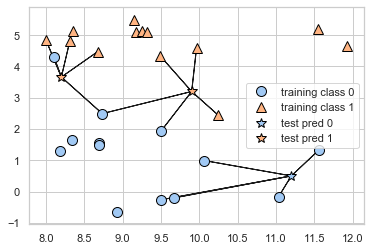

In [251]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [252]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_train_features,df_train_labels.astype("int"))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**weight** feature can have values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
By default, "uniform" is used.
‘auto’ is the algorithm based on the values passed to fit method, but other can be used: *‘ball_tree’* will use BallTree
*‘kd_tree’* will use KDTree
*‘brute’* will use a brute-force search.

The distance metric used for the tree is by default "minkowski", and with p=2 is equivalent to the standard Euclidean metric. 

To evaluate the model, the score method for train and test data is run:

In [253]:
print("Train set score",knn.score(df_train_features,df_train_labels.astype("int")))

Train set score 0.9625


In [254]:
print("Test set score:",knn.score(df_test_features, df_test_labels.astype("int")))

Test set score: 0.95


In [255]:
y_pred = knn.predict(df_test_features)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [256]:
df_test_labels

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1.])

In [257]:
probabilities = knn.predict_proba(df_test_features)
print(probabilities[:15,:])

[[0.  1. ]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]]


Now that the class probabilities have been computed these values must be transformed into actual class scores.The simple choice is to set the threshold between the two likelihoods at $0.5$. The code in the cell below applies this initial threshold to the probability of a score of $0$ for the test data. 

In [258]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores_knn = score_model(probabilities, 0.5)
print(np.array(scores))
print(df_test_labels.astype("int"))

[0.75 0.95 1.   0.7  0.55]
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [259]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
print_metrics(df_test_labels.astype("int"), scores_knn )    

                 Confusion matrix
                 Score positive    Score negative
Actual positive        10                 0
Actual negative         1                 9

Accuracy  0.95
 
           Positive      Negative
Num case       10            10
Precision    0.91          1.00
Recall       1.00          0.90
F1           0.95          0.95


Fewer neighbors corresponds to a more complex model.
In the next cell, the score for different number of neighbors is presented. 

When using only a  single nearest neighbor, the prediction on the training set is perfect. When more neighbors are considered, the model becomes simpler and the training accuracy drops. 

The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. 

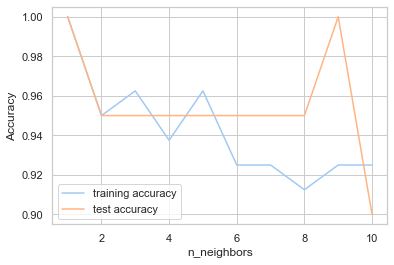

In [260]:
%matplotlib inline
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(df_train_features,df_train_labels.astype("int"))
     # record training set accuracy
    training_accuracy.append(knn.score(df_train_features,df_train_labels.astype("int")))
     # record generalization accuracy
    test_accuracy.append(knn.score(df_test_features, df_test_labels.astype("int")))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


Strengths of k-NN:
* the model is very easy to understand,
* the model gives reasonable performance without a lot of adjustments. 
* Using this algorithm is a good baseline method to try before considering more advanced techniques. 

Weaknesses of k-NN:
* For large datasets (either in number of features or in number of samples) prediction can be slow.
* When using the k-NN algorithm, it’s important to preprocess your data (it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).


In [261]:
from sklearn.model_selection import cross_val_score
def cross_val(model):
    scores = cross_val_score(model,df,df["Category"].astype("int"),cv=5)
    print("Cross-validation scores: {}".format(scores))
    return print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [262]:
cross_knn=cross_val(knn)

Cross-validation scores: [1.   1.   1.   0.6  0.45]
Average cross-validation score: 0.81


# Linear models for classification

For linear models for regression, the output, ŷ, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane. 

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm. LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm.
For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization.  Regularization means explicitly restricting a model to avoid overfitting. 

In high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly important when considering more features. It is necessary to keep the balance between the simplicity of the model and performance on training data.

In [263]:
logreg = LogisticRegression().fit(df_train_features,df_train_labels.astype("int"))
print("Training set score: {:.3f}".format(logreg.score(df_train_features,df_train_labels.astype("int"))))
print("Test set score: {:.3f}".format(logreg.score(df_test_features,df_test_labels.astype("int"))))

Training set score: 0.800
Test set score: 0.750


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [264]:
print(logreg.coef_)
print(logreg.intercept_)

[[-1.39105714e+00 -3.22834575e-02  2.14443938e-03  2.97499007e-02
  -5.56922431e-02  1.17148561e-02 -1.79278657e-02  5.71956303e-03
  -3.58303718e-04  3.85248421e-02 -8.70403050e-02  1.38425584e+00
  -1.52745344e-02 -2.31122752e-03  3.75127366e-01]]
[-0.01910524]


In [265]:
lsvc = LinearSVC().fit(df_train_features,df_train_labels.astype("int"))
print("Training set score: {:.3f}".format(lsvc.score(df_train_features,df_train_labels.astype("int"))))
print("Test set score: {:.3f}".format(lsvc.score(df_test_features,df_test_labels.astype("int"))))

Training set score: 0.375
Test set score: 0.500


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [266]:
cross_knn=cross_val(logreg)

Cross-validation scores: [1.   1.   1.   0.7  0.75]
Average cross-validation score: 0.89


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [267]:
cross_knn=cross_val(lsvc)

Cross-validation scores: [0.75 0.65 0.65 0.6  0.45]
Average cross-validation score: 0.62


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of

By default, both models apply an L2 regularization and default value of C=1 regularization parameter.

In the next step, L1 regularization is used with three different regularization parameters. L1 regularization means that some coefficients in linear model will not be close, but equal to zero.It limits the model to using only a few features.

In [268]:
for C in[0.001, 1, 100]:
 lr_l1 = LogisticRegression(C=C, penalty="l1",max_iter=1000, solver='liblinear').fit(df_train_features,df_train_labels.astype("int"))
 print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(df_train_features,df_train_labels.astype("int"))))
 print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(df_test_features,df_test_labels.astype("int"))))


Training accuracy of l1 logreg with C=0.001: 0.62
Test accuracy of l1 logreg with C=0.001: 0.50


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of l1 logreg with C=1.000: 0.78
Test accuracy of l1 logreg with C=1.000: 0.75
Training accuracy of l1 logreg with C=100.000: 0.78
Test accuracy of l1 logreg with C=100.000: 0.75


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Both training and test set accuracy decrease relative to the default parameters.

For small datasets, ‘liblinear’ is a good choice for algorithm and can handle L1 penalty.Small values for C mean simple models. If is assumed that only a few of fea‐
tures are actually important, L1 should be used. Otherwise, you should default to L2.

Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). In the following example, it is done for the value C=1 and 'liblinear' algorithm. 

In [269]:
lr_l1 = LogisticRegression(C=1, penalty="l1",max_iter=1000, solver='liblinear').fit(df_train_features,df_train_labels.astype("int"))
print("Training accuracy of l1 logreg", lr_l1.score(df_train_features,df_train_labels.astype("int")))

Training accuracy of l1 logreg 0.775


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [270]:
probabilities = lr_l1.predict_proba(df_test_features)
print(probabilities[:15,:])

[[0.74830506 0.25169494]
 [0.91831696 0.08168304]
 [0.43966789 0.56033211]
 [0.81547105 0.18452895]
 [0.79550508 0.20449492]
 [0.8897714  0.1102286 ]
 [0.6577646  0.3422354 ]
 [0.65192875 0.34807125]
 [0.86138401 0.13861599]
 [0.37941471 0.62058529]
 [0.59107988 0.40892012]
 [0.89771163 0.10228837]
 [0.57471982 0.42528018]
 [0.05789918 0.94210082]
 [0.02131883 0.97868117]]


In [271]:
scores_lr1 = score_model(probabilities, 0.5)
print(np.array(scores_lr1))
print(df_test_labels.astype("int"))

[0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1]
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [272]:
print_metrics(df_test_labels.astype("int"), scores_lr1 ) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive         9                 1
Actual negative         4                 6

Accuracy  0.75
 
           Positive      Negative
Num case       10            10
Precision    0.69          0.86
Recall       0.90          0.60
F1           0.78          0.71


In [273]:
cross_knn=cross_val(lr_l1)

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.00


# Decision trees

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. The recursive partitioning of the data is repeated until each region in the partition(each leaf in the decision tree) only contains a single target value (a single class or a single regression value). A leaf of the tree that contains data points that all share the
same target value is called **pure**. 

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region. 

Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. 

In [274]:
from sklearn.tree import DecisionTreeClassifier

In [275]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(tree.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(tree.score(df_test_features,df_test_labels.astype("int"))))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


As expected, the accuracy on the training set is 100%—because the leaves are pure,the tree was grown deep enough that it could perfectly memorize all the labels on the
training data.If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
and complex. Unpruned trees are therefore prone to overfitting and not generalizing
well to new data. Now let’s apply pre-pruning to the tree, which will stop developing
the tree before we perfectly fit to the training data. 

In [276]:
tree_pruned = DecisionTreeClassifier(max_depth=5,random_state=0)
tree_pruned.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(tree_pruned.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(tree_pruned.score(df_test_features,df_test_labels.astype("int"))))

Accuracy on training set: 0.988
Accuracy on test set: 1.000


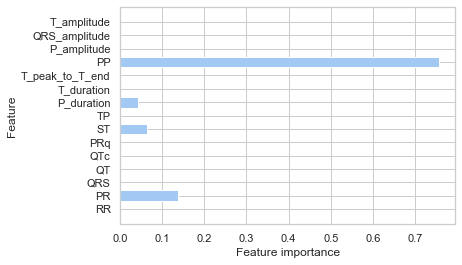

In [277]:
def plot_feature_importances_(model):
 n_features = 15
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), df.columns[:15])
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_(tree)

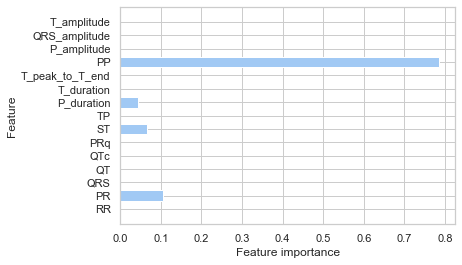

In [278]:
plot_feature_importances_(tree_pruned)

In [279]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.13625071 0.         0.         0.         0.
 0.06350686 0.         0.04266667 0.         0.         0.75757576
 0.         0.         0.        ]


In [ ]:
#Ovo će biti dopunjeno

In [280]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(forest.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(forest.score(df_test_features,df_test_labels.astype("int"))))


Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [281]:
from sklearn.ensemble import RandomForestClassifier
forest_pruned= RandomForestClassifier(max_depth=5,n_estimators=100, random_state=0)
forest_pruned.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(forest_pruned.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(forest_pruned.score(df_test_features,df_test_labels.astype("int"))))


Accuracy on training set: 0.988
Accuracy on test set: 1.000


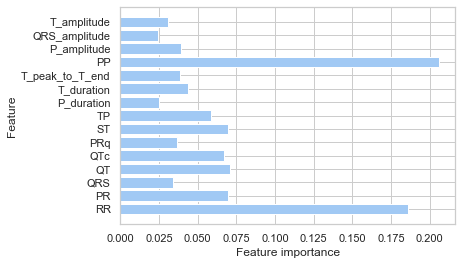

In [282]:
plot_feature_importances_(forest)

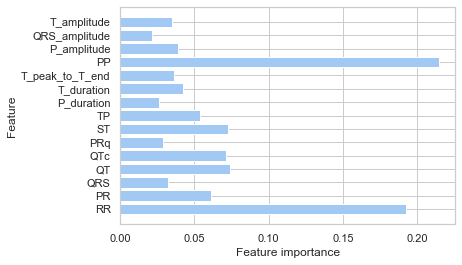

In [220]:
plot_feature_importances_(forest_pruned)

In [ ]:
#ovo će  biti dopunjeno

In [283]:
from sklearn.svm import SVC

In [284]:
svc = SVC()
svc.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.2f}".format(svc.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.2f}".format(svc.score(df_test_features,df_test_labels.astype("int"))))

Accuracy on training set: 1.00
Accuracy on test set: 0.50


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [285]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(tree.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(tree.score(df_test_features,df_test_labels.astype("int"))))

Accuracy on training set: 0.975
Accuracy on test set: 1.000


In [286]:
set_score=np.zeros((8,2))
set_score[0,0]=knn.score(df_train_features,df_train_labels.astype("int"))
set_score[0,1]=knn.score(df_test_features,df_test_labels.astype("int"))

set_score[1,0]=logreg.score(df_train_features,df_train_labels.astype("int"))
set_score[1,1]=logreg.score(df_test_features,df_test_labels.astype("int"))

set_score[2,0]=lsvc.score(df_train_features,df_train_labels.astype("int"))
set_score[2,1]=lsvc.score(df_test_features,df_test_labels.astype("int"))

set_score[3,0]=lr_l1.score(df_train_features,df_train_labels.astype("int"))
set_score[3,1]=lr_l1.score(df_test_features,df_test_labels.astype("int"))

set_score[4,0]=tree.score(df_train_features,df_train_labels.astype("int"))
set_score[4,1]=tree.score(df_test_features,df_test_labels.astype("int"))

set_score[5,0]=tree_pruned.score(df_train_features,df_train_labels.astype("int"))                
set_score[5,1]=tree_pruned.score(df_test_features,df_test_labels.astype("int"))

set_score[6,0]=forest.score(df_train_features,df_train_labels.astype("int"))
set_score[6,1]=forest.score(df_test_features,df_test_labels.astype("int"))

set_score[7,0]=forest_pruned.score(df_train_features,df_train_labels.astype("int"))
set_score[7,1]=forest_pruned.score(df_test_features,df_test_labels.astype("int"))

In [287]:
set_score=pd.DataFrame(set_score, columns=["Train","Test"], index=["KNN", "logistic(L2)"," LSVC(L2)", "Logistic(L1)","Tree","Tree (depth=3)","Random forest","Random forest pruned"])

In [288]:
set_score

Train  Test
KNN                   0.9250  0.90
logistic(L2)          0.8000  0.75
 LSVC(L2)             0.3750  0.50
Logistic(L1)          0.7750  0.75
Tree                  0.9750  1.00
Tree (depth=3)        0.9875  1.00
Random forest         1.0000  1.00
Random forest pruned  0.9875  1.00